In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os 
from tqdm.notebook import tqdm_notebook as tqdm
import cv2
import skimage
from skimage.transform import resize
import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.layers import Activation, MaxPool2D, Concatenate
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print(physical_devices)
# if physical_devices:
#     tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
try:
    # Disable all GPUS
    tf.config.set_visible_devices([], 'GPU')
    visible_devices = tf.config.get_visible_devices()
    for device in visible_devices:
        assert device.device_type != 'GPU'
except:
    # Invalid device or cannot modify virtual devices once initialized.
    pass

In [4]:
# df = pd.read_pickle(r"../../Datasets/Dataset_A_resized_256.pkl")

In [5]:
# print("MR Image shape:   {}".format(df["Tumor Mask"][0].shape))
# print("Tumor Mask shape: {}".format(df["Tumor Mask"][0].shape))

In [6]:
def normalize(img):
    plt.imsave('DR.png', img, cmap='gray')
    return cv2.imread('DR.png')[:, :, 0]

# df.Images = df.Images.apply(normalize)

In [7]:
classes_dict = {"Not Tumor": 0, "Meningioma": 1, "Glioma": 2, "Pituitary": 3}
# for index, row in df.iterrows():
#     row["Tumor Mask"] = row["Tumor Mask"] * classes_dict[row["Labels"]]
#     row["Images"] = normalize(row["Images"])

In [8]:
2+2

4

In [9]:
# df.head()

In [10]:
# randInt = np.random.randint(0,len(df))

# # create figure
# fig = plt.figure(figsize=(10, 7))
  
# # setting values to rows and column variables
# rows = 1
# columns = 2

# img  = df.Images[randInt]
# mask = df["Tumor Mask"][randInt]
# tumorBorder = df["Tumor Border"][randInt]


# # Display Original Image
# fig.add_subplot(rows, columns, 1)
# plt.imshow(img, cmap='gray')
# plt.title('Original Image ({})'.format(df.Labels[randInt]))
# plt.axis('off')
  
# # Display Tumor Mask
# fig.add_subplot(rows, columns, 2)
# plt.imshow(mask, cmap='gray')
# plt.title('Tumor Mask ({})'.format(np.unique(mask)))
# plt.axis('off')
# plt.show()

In [11]:
# ## Splitting Images form masks
# img_size = 256

# Y = df["Tumor Mask"].tolist()
# X = df['Images'].tolist()

# ## Adding extra Color channel to the grayscale images
# Y = np.array(Y).reshape(-1, img_size, img_size)
# Y = Y.astype(float)

# X = np.array(X).reshape(-1, img_size, img_size)

# print(f"shape of images: {X.shape}\nshape of labels: {Y.shape}")

In [12]:
# from sklearn.preprocessing import LabelEncoder

# train_masks = Y
# labelencoder = LabelEncoder()
# n, h, w = train_masks.shape
# train_masks_reshaped = train_masks.reshape(-1,1)
# train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped.ravel())
# train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)

# np.unique(train_masks_encoded_original_shape)

In [13]:
# from tensorflow.keras.utils import normalize

# train_images = np.expand_dims(X, axis=3)
# train_images = train_images/255

# train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)

In [14]:
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.utils import to_categorical
# n_classes = len(np.unique(train_masks_input))

# X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks_input, test_size=0.25, random_state=42)
# print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled 


# train_masks_cat = to_categorical(y_train, num_classes=n_classes)
# y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))



# test_masks_cat = to_categorical(y_test, num_classes=n_classes)
# y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))

In [15]:
# print("X_train shape:", X_train.shape,"| y_train shape:", y_train_cat.shape)
# print("X_test shape :",X_test.shape,"| y_test shape : ", y_test_cat.shape)

# print("\nTotal Data: ", len(df))

In [16]:
# plt.imshow(y_test_cat[0, :, :, 0], 'gray')

In [17]:
# plt.imshow(y_test_cat[0, :, :, 1], 'gray')

In [18]:
# plt.imshow(y_test_cat[0, :, :, 2], 'gray')

In [19]:
# plt.imshow(y_test_cat[0, :, :, 3], 'gray')

In [20]:
# plt.imshow(X_test[0, :, :, :], 'gray')

In [21]:
# X_test[0, :, :, :].max()

In [22]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
#                                                  classes = np.unique(train_masks_reshaped_encoded),
#                                                  y = train_masks_reshaped_encoded)
# print("Class weights are...:", class_weights)


# IMG_HEIGHT = X_train.shape[1]
# IMG_WIDTH  = X_train.shape[2]
# IMG_CHANNELS = X_train.shape[3]

In [23]:
# class_weights = {0: class_weights[0], 1: class_weights[1], 2: class_weights[2], 3: class_weights[3]}
# print("Class weights are...:", class_weights)

In [24]:
# # Building Unet by dividing encoder and decoder into blocks
# def conv_block(input, num_filters):
#     x = Conv2D(num_filters, 3, padding="same")(input)
#     x = BatchNormalization()(x)   #Not in the original network. 
#     x = Activation("relu")(x)

#     x = Conv2D(num_filters, 3, padding="same")(x)
#     x = BatchNormalization()(x)  #Not in the original network
#     x = Activation("relu")(x)

#     return x

# #Encoder block: Conv block followed by maxpooling


# def encoder_block(input, num_filters):
#     x = conv_block(input, num_filters)
#     p = MaxPool2D((2, 2))(x)
#     return x, p   

# #Decoder block
# #skip features gets input from encoder for concatenation

# def decoder_block(input, skip_features, num_filters):
#     x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
#     x = Concatenate()([x, skip_features])
#     x = conv_block(x, num_filters)
#     return x

# #Build Unet using the blocks
# def build_unet(n_classes, input_shape):
#     inputs = Input(input_shape)

#     s1, p1 = encoder_block(inputs, 64)
#     s2, p2 = encoder_block(p1, 128)
#     s3, p3 = encoder_block(p2, 256)
#     s4, p4 = encoder_block(p3, 512)

#     b1 = conv_block(p4, 1024) #Bridge

#     d1 = decoder_block(b1, s4, 512)
#     d2 = decoder_block(d1, s3, 256)
#     d3 = decoder_block(d2, s2, 128)
#     d4 = decoder_block(d3, s1, 64)

#     outputs = Conv2D(n_classes, (1, 1), activation='softmax')(d4)  #Binary (can be multiclass)

#     model = Model(inputs, outputs, name="U-Net")
#     return model


In [25]:
# import os
# exp_num = []
# if not os.path.exists("./experiments"):
#     os.mkdir("./experiments")
# folders = os.listdir("./experiments")
# for folder in folders:
#     exp_num.append(int(folder.split("#")[1]))


# if len(exp_num) == 0:
#     exp_path = r"./experiments/exp#1"
# else:
#     exp_path = r"./experiments/exp#"+str(max(exp_num)+1)




# os.mkdir(exp_path)
# os.mkdir(os.path.join(exp_path, "results"))
# os.mkdir(os.path.join(exp_path, "weights"))

# results = os.path.join(exp_path, "results")
# weights = os.path.join(exp_path, "weights")

In [26]:
# input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

# model = build_unet(n_classes, input_shape)
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [27]:
# from keras.callbacks import ModelCheckpoint

# model_checkpoint_callback = ModelCheckpoint(
#     filepath= os.path.join(weights, "best.h5"),
#     verbose=1, 
#     save_best_only=False, 
#     mode='max')
    
# model.fit(X_train, 
#         y_train_cat, 
#         batch_size = 4, 
#         verbose=1, 
#         epochs=60, 
#         validation_data=(X_test, y_test_cat), 
#         callbacks=[model_checkpoint_callback],
# #         sample_weight=np.array(class_weights),
#         shuffle=False)

In [28]:
# acc = model.evaluate(X_test, y_test_cat)[0]
# name = str(round(acc, 4))

In [29]:
# Save The Trained model along with it training history   
# metrics.to_pickle(os.path.join(results, name+'.pkl'))
# model.save(os.path.join(weights, "First_Mulit_UNet" + '.h5'))

In [30]:
# np.save("X_test.npy", X_test)
# np.save("y_test.npy", y_test)

In [31]:
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

In [32]:
model = tf.keras.models.load_model(r".\experiments\exp#16\weights\best.h5")
metrics = pd.read_pickle(r".\experiments\exp#16\results\metrics.pkl""")

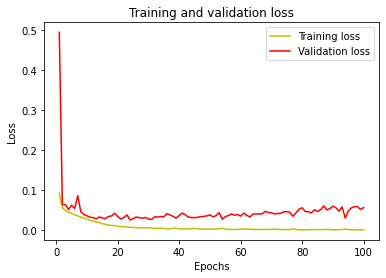

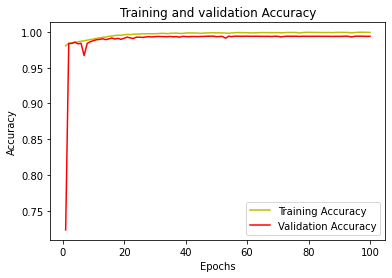

In [33]:
loss = metrics['loss']
val_loss = metrics['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

accuracy = metrics['accuracy']
val_accuracy = metrics['val_accuracy']

plt.plot(epochs, accuracy, 'y', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
#IOU
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)

##################################################

#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 4
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_test[:,:,:,0], y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())


#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1] + values[0,2] + values[0,3] + values[1,0]+ values[2,0]+ values[3,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0] + values[1,2] + values[1,3] + values[0,1]+ values[2,1]+ values[3,1])
class3_IoU = values[2,2]/(values[2,2] + values[2,0] + values[2,1] + values[2,3] + values[0,2]+ values[1,2]+ values[3,2])
class4_IoU = values[3,3]/(values[3,3] + values[3,0] + values[3,1] + values[3,2] + values[0,3]+ values[1,3]+ values[2,3])

print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)
print("IoU for class3 is: ", class3_IoU)
print("IoU for class4 is: ", class4_IoU)

# plt.imshow(train_images[0, :,:,0], cmap='gray')
# plt.imshow(train_masks[0], cmap='gray')

Mean IoU = 0.7824102
[[1.6777216e+07 1.0435000e+04 5.6526000e+04 1.0507000e+04]
 [2.5802000e+04 2.0103300e+05 4.3850000e+03 4.0770000e+03]
 [1.7018700e+05 3.7200000e+02 3.2249200e+05 5.7000000e+01]
 [2.2714000e+04 5.7000000e+01 1.1000000e+01 1.1121700e+05]]
IoU for class1 is:  0.98265314
IoU for class2 is:  0.8166728
IoU for class3 is:  0.582084
IoU for class4 is:  0.74823064


In [35]:
def prob_class(predicted_img, class_dic):
    rev_classes_dict = dict([(value, key) for key, value in class_dic.items()])
    result = ""
    if len(np.unique(predicted_img)) == 1:
        result = "(No Tumor)"
    else:
        for cls in np.unique(predicted_img):
            if cls != 0:
                prob = (predicted_img == cls).sum() / (0 != predicted_img).sum() 
                result += "({} {}%) ".format(rev_classes_dict[cls], str( round(prob*100, 2) ))

    return result

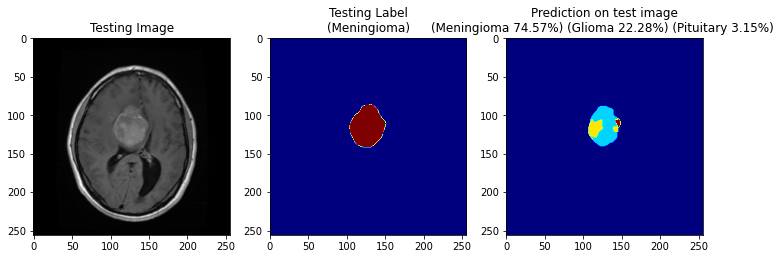

In [46]:
import random
test_img_number = random.randint(0, len(X_test))
rev_classes_dict = dict([(value, key) for key, value in classes_dict.items()])



test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]

test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')

plt.subplot(232)
plt.title('Testing Label\n({})'.format(rev_classes_dict[np.unique(ground_truth)[1]]))
plt.imshow(ground_truth[:,:,0], cmap='jet')

plt.subplot(233)
plt.title('Prediction on test image\n{}'.format(prob_class(predicted_img, classes_dict)))
plt.imshow(predicted_img, cmap='jet')
plt.show()